In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from scipy.stats import norm

## 1-1- Monte carlo approximation of C0


$C_0 = e^{−rT}N(−d_{-}(X_0,\sigma^{2} T))$,  with $X_0 = \frac{S_0}{Ke^{-rT}}$

In [5]:
def d(x,v):
    return np.log(x)/np.sqrt(v) - 0.5*np.sqrt(v)
def C_0(r,sigma,S0,T,K):
    return np.exp(-r*T)*norm.cdf(-d(S0/(K*np.exp(-r*T)),T*sigma**2))
def gauss(x):
    return np.exp(-0.5*x**2)/(np.sqrt(2*np.pi))
def Delta_0(r,sigma,S0,T,K):
    return (-np.exp(-r*T)/(S0*sigma*np.sqrt(T)))*gauss(-d(S0/(K*np.exp(-r*T)),T*sigma**2))

## 1-2- Monte Carlo Approximation
$ C_0 = e^{-rT} E ( 1_{S_T <= K})$

In [2]:
def S(n,M,r,sigma,T):
    np.random.seed(0)
    pas = T/n
    times=np.linspace(0,T,n)
    echantillon=np.random.normal(0,np.sqrt(pas), size=(M,n-1))
    trajectoires =np.cumsum(echantillon, axis=1)
    trajectoires=np.hstack((np.array([np.array([0]*M)]).T,trajectoires))
    S = np.exp((r-(sigma**2)/2)*times + sigma*trajectoires)
    return [S,trajectoires]

In [3]:
def c_approx(r,T,K,S_T):
    C_0 = np.mean((S_T<=K).astype(np.int8))
    return np.exp(-r*T)*C_0

## 1-3 visualisation

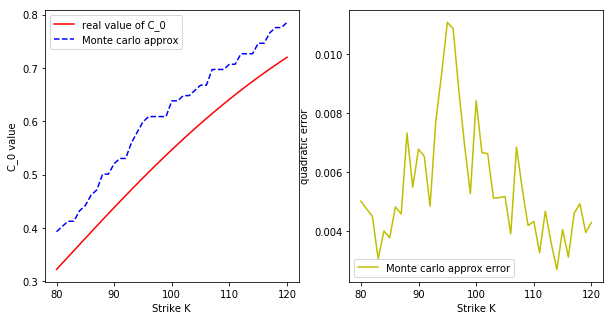

In [8]:
r=0.02
sigma=0.4
S_0=100
T=0.9
M = 100
n=100
S_T = S_0*(S(n,M,r,sigma,T)[0][:,-1])
#print(S_T)
Ks = [80+i for i in range(41)]
C_approxs=[]
Cr= []
for K in Ks:
    C_approxs.append(c_approx(r,T,K,S_T))
    Cr.append(C_0(r,sigma,S_0,T,K))
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(Ks,Cr,color='r', label = 'real value of C_0')
plt.plot(Ks, C_approxs, color ='b',label='Monte carlo approx', linestyle="--")
plt.xlabel("Strike K")
plt.ylabel("C_0 value")
plt.legend()
plt.subplot(1,2,2)
plt.plot(Ks, (np.array(Cr)-np.array(C_approxs))**2, color ='y',label='Monte carlo approx error')
plt.xlabel("Strike K")
plt.ylabel("quadratic error")
plt.legend()
plt.show()

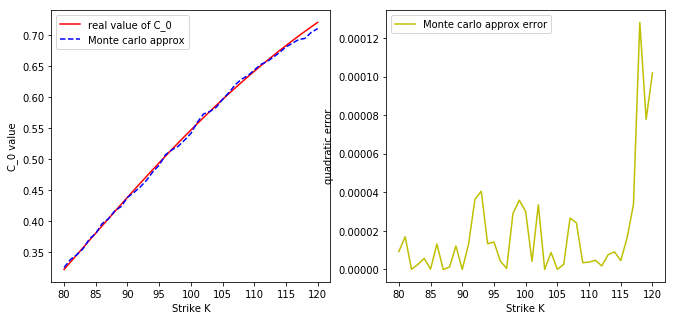

In [10]:
r=0.02
sigma=0.4
S0=100
T=0.9
M = 1000
n=100
S_T = S_0*(S(n,M,r,sigma,T)[0][:,-1])
Cr = []
Ks = [80+i for i in range(41)]
C_approxs=[]
for K in Ks:
    C_approxs.append(c_approx(r,T,K,S_T))
    Cr.append(C_0(r,sigma,S_0,T,K))
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.plot(Ks,Cr,color='r', label = 'real value of C_0')
plt.plot(Ks, C_approxs, color ='b',label='Monte carlo approx', linestyle="--")
plt.xlabel("Strike K")
plt.ylabel("C_0 value")
plt.legend()
plt.subplot(1,2,2)
plt.plot(Ks, (np.array(Cr)-np.array(C_approxs))**2, color ='y',label='Monte carlo approx error')
plt.xlabel("Strike K")
plt.ylabel("quadratic error")
plt.legend()
plt.show()

When M is increasing, we can see that the approximation error is decreasing

## 2-1 confidence interval

In [12]:
def Delta_M_ep(S_0,S1,S2,r,T,K,M,sigma,eps):
    return (c_approx(r,T,K,S1)-c_approx(r,T,K,S2))/(2*eps)

## 2-2 visualisation

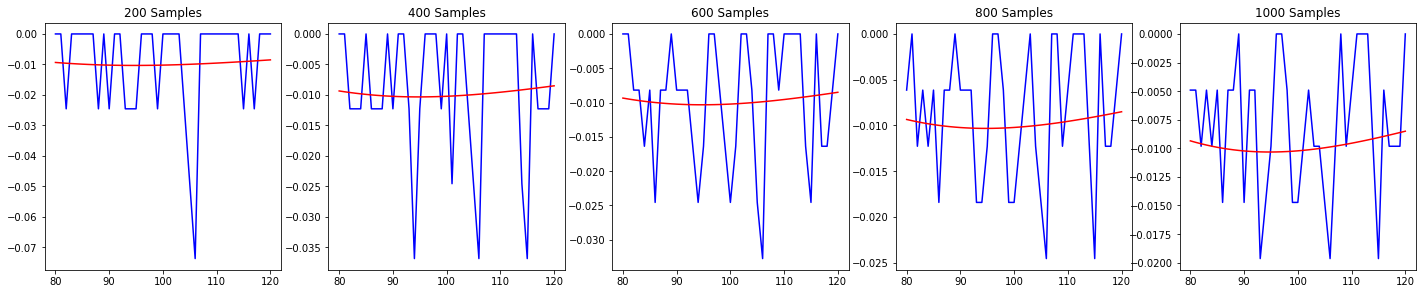

In [22]:
r=0.02
sigma=0.4
S0=100
T=0.9
eps=0.1
n=100
count=0
plt.figure(figsize=(50, 10))
for M in range(200,1001,200):
    count= count+1
    Deltas=[]
    deltas=[]
    A=S(n,M,r,sigma,T)[0][:,-1]
    S1 = (S_0+eps)*A
    S2 = (S_0-eps)*A
    for K in Ks:
        Deltas.append(Delta_M_ep(S_0,S1,S2,r,T,K,M,sigma,eps))
        deltas.append(Delta_0(r,sigma,S0,T,K))
    plt.subplot(2,10,count)
    plt.title(str(M)+' Samples')
    plt.plot(Ks,Deltas, color='b')
    plt.plot(Ks,deltas, color="r")
plt.show()

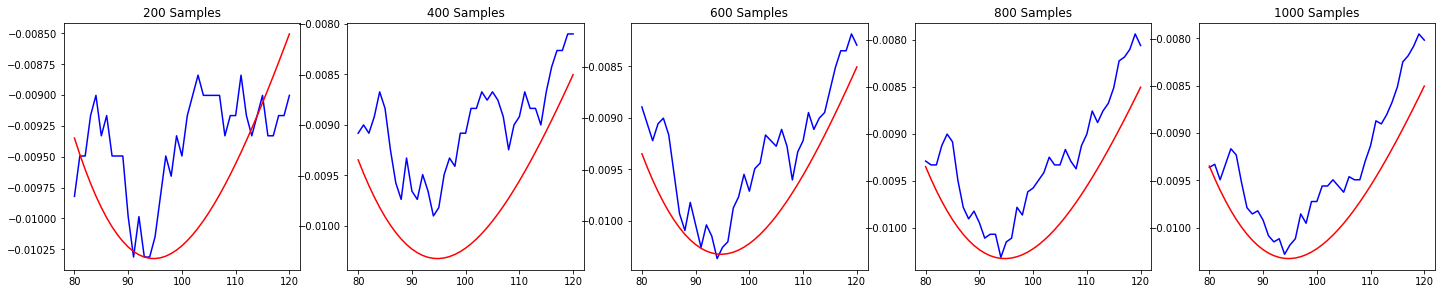

In [21]:
r=0.02
sigma=0.4
S0=100
T=0.9
eps=15
n=100
count=0
plt.figure(figsize=(50, 10))
for M in range(200,1001,200):
    count= count+1
    Deltas=[]
    deltas=[]
    S1 = (S_0+eps)*(S(n,M,r,sigma,T)[0][:,-1])
    S2 = (S_0-eps)*(S(n,M,r,sigma,T)[0][:,-1])
    for K in Ks:
        Deltas.append(Delta_M_ep(S_0,S1,S2,r,T,K,M,sigma,eps))
        deltas.append(Delta_0(r,sigma,S0,T,K))
    plt.subplot(2,10,count)
    plt.title(str(M)+' Samples')
    plt.plot(Ks,Deltas, color='b')
    plt.plot(Ks,deltas, color="r")
plt.show()

To evoid the observation of the no-regularity of the monte carlo approximation of the price we choose a good value of $\epsilon$ i.e a great value. Then this approximation is not the best approch. 

## 3-1 Monte Carlo approximation

In [23]:
def Delta_approx(r,T,K,S_T,B_T):
    D_0 = np.mean((B_T/(S0*sigma*T))*(S_T<=K).astype(np.int8))
    return np.exp(-r*T)*D_0

## 3-2 Visualisation

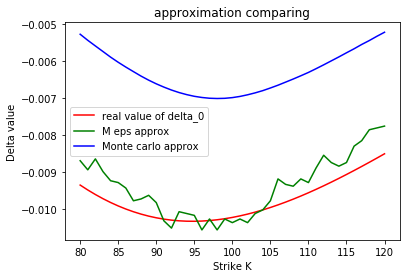

In [26]:
r=0.02
sigma=0.4
S0=100
T=0.9
M = 1000
eps=10
n=100
S_T = S_0*(S(n,M,r,sigma,T)[0][:,:-1])
B_T = S(n,M,r,sigma,T)[1][:,:-1]
Ks = [80+i for i in range(41)]
Delta_approxs1=[]
Delta_approxs2=[]
deltas=[]
S1 = (S_0+eps)*(S(n,M,r,sigma,T)[0][:,-1])
S2 = (S_0-eps)*(S(n,M,r,sigma,T)[0][:,-1])
for K in Ks:
    Delta_approxs1.append(Delta_approx(r,T,K,S_T,B_T))
    Delta_approxs2.append(Delta_M_ep(S_0,S1,S2,r,T,K,M,sigma,eps))
    deltas.append(Delta_0(r,sigma,S0,T,K))
plt.figure()
plt.plot(Ks,deltas,color='r', label = 'real value of delta_0')
plt.plot(Ks, Delta_approxs2, color ='g',label='M eps approx')
plt.plot(Ks, Delta_approxs1, color ='b',label='Monte carlo approx')
plt.title('approximation comparing')
plt.xlabel('Strike K')
plt.ylabel('Delta value')
plt.legend(loc = 'best')
plt.show()

Although the approximation error can be 0.005, the monte carlo approximation have a good description of delta, then it is the best approximation of delta